<a href="https://colab.research.google.com/github/3791xk/invasive-plants-ml/blob/main/notebooks/A4C_Project_Status_Update_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Data Loading

In [ ]:
import os
import time
from tempfile import TemporaryDirectory
from PIL import Image
import pandas as pd
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("imageomics/invasive_plants_hawaii", name="full", split="both")

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/46 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/46 [00:00<?, ?it/s]

full/dorsal-00008-of-00024.parquet:   0%|          | 0.00/544M [00:00<?, ?B/s]

full/dorsal-00010-of-00024.parquet:   0%|          | 0.00/360M [00:00<?, ?B/s]

full/dorsal-00011-of-00024.parquet:   0%|          | 0.00/361M [00:00<?, ?B/s]

full/dorsal-00012-of-00024.parquet:   0%|          | 0.00/415M [00:00<?, ?B/s]

full/dorsal-00013-of-00024.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

full/dorsal-00014-of-00024.parquet:   0%|          | 0.00/381M [00:00<?, ?B/s]

full/dorsal-00015-of-00024.parquet:   0%|          | 0.00/502M [00:00<?, ?B/s]

full/dorsal-00016-of-00024.parquet:   0%|          | 0.00/320M [00:00<?, ?B/s]

full/dorsal-00017-of-00024.parquet:   0%|          | 0.00/378M [00:00<?, ?B/s]

full/dorsal-00018-of-00024.parquet:   0%|          | 0.00/382M [00:00<?, ?B/s]

full/dorsal-00019-of-00024.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

full/dorsal-00020-of-00024.parquet:   0%|          | 0.00/468M [00:00<?, ?B/s]

full/dorsal-00021-of-00024.parquet:   0%|          | 0.00/549M [00:00<?, ?B/s]

full/dorsal-00022-of-00024.parquet:   0%|          | 0.00/543M [00:00<?, ?B/s]

full/dorsal-00023-of-00024.parquet:   0%|          | 0.00/561M [00:00<?, ?B/s]

full/ventral-00000-of-00023.parquet:   0%|          | 0.00/850M [00:00<?, ?B/s]

full/ventral-00001-of-00023.parquet:   0%|          | 0.00/703M [00:00<?, ?B/s]

full/ventral-00002-of-00023.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

full/ventral-00003-of-00023.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

full/ventral-00004-of-00023.parquet:   0%|          | 0.00/440M [00:00<?, ?B/s]

full/ventral-00005-of-00023.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

full/ventral-00006-of-00023.parquet:   0%|          | 0.00/463M [00:00<?, ?B/s]

full/ventral-00007-of-00023.parquet:   0%|          | 0.00/579M [00:00<?, ?B/s]

full/ventral-00008-of-00023.parquet:   0%|          | 0.00/506M [00:00<?, ?B/s]

full/ventral-00009-of-00023.parquet:   0%|          | 0.00/381M [00:00<?, ?B/s]

full/ventral-00010-of-00023.parquet:   0%|          | 0.00/380M [00:00<?, ?B/s]

full/ventral-00011-of-00023.parquet:   0%|          | 0.00/397M [00:00<?, ?B/s]

full/ventral-00012-of-00023.parquet:   0%|          | 0.00/465M [00:00<?, ?B/s]

full/ventral-00013-of-00023.parquet:   0%|          | 0.00/419M [00:00<?, ?B/s]

full/ventral-00014-of-00023.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

full/ventral-00015-of-00023.parquet:   0%|          | 0.00/322M [00:00<?, ?B/s]

full/ventral-00016-of-00023.parquet:   0%|          | 0.00/377M [00:00<?, ?B/s]

full/ventral-00017-of-00023.parquet:   0%|          | 0.00/393M [00:00<?, ?B/s]

full/ventral-00018-of-00023.parquet:   0%|          | 0.00/395M [00:00<?, ?B/s]

full/ventral-00019-of-00023.parquet:   0%|          | 0.00/462M [00:00<?, ?B/s]

full/ventral-00020-of-00023.parquet:   0%|          | 0.00/567M [00:00<?, ?B/s]

full/ventral-00021-of-00023.parquet:   0%|          | 0.00/559M [00:00<?, ?B/s]

full/ventral-00022-of-00023.parquet:   0%|          | 0.00/578M [00:00<?, ?B/s]

full/both-00000-of-00046.parquet:   0%|          | 0.00/845M [00:00<?, ?B/s]

full/both-00001-of-00046.parquet:   0%|          | 0.00/846M [00:00<?, ?B/s]

full/both-00002-of-00046.parquet:   0%|          | 0.00/849M [00:00<?, ?B/s]

full/both-00003-of-00046.parquet:   0%|          | 0.00/551M [00:00<?, ?B/s]

full/both-00004-of-00046.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

full/both-00005-of-00046.parquet:   0%|          | 0.00/465M [00:00<?, ?B/s]

full/both-00006-of-00046.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

full/both-00007-of-00046.parquet:   0%|          | 0.00/437M [00:00<?, ?B/s]

full/both-00008-of-00046.parquet:   0%|          | 0.00/443M [00:00<?, ?B/s]

full/both-00009-of-00046.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

full/both-00010-of-00046.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

full/both-00011-of-00046.parquet:   0%|          | 0.00/425M [00:00<?, ?B/s]

full/both-00012-of-00046.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

full/both-00013-of-00046.parquet:   0%|          | 0.00/522M [00:00<?, ?B/s]

full/both-00014-of-00046.parquet:   0%|          | 0.00/579M [00:00<?, ?B/s]

full/both-00015-of-00046.parquet:   0%|          | 0.00/579M [00:00<?, ?B/s]

full/both-00016-of-00046.parquet:   0%|          | 0.00/582M [00:00<?, ?B/s]

full/both-00017-of-00046.parquet:   0%|          | 0.00/434M [00:00<?, ?B/s]

full/both-00018-of-00046.parquet:   0%|          | 0.00/384M [00:00<?, ?B/s]

full/both-00019-of-00046.parquet:   0%|          | 0.00/380M [00:00<?, ?B/s]

full/both-00020-of-00046.parquet:   0%|          | 0.00/380M [00:00<?, ?B/s]

full/both-00021-of-00046.parquet:   0%|          | 0.00/383M [00:00<?, ?B/s]

full/both-00022-of-00046.parquet:   0%|          | 0.00/380M [00:00<?, ?B/s]

full/both-00023-of-00046.parquet:   0%|          | 0.00/418M [00:00<?, ?B/s]

full/both-00024-of-00046.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

full/both-00025-of-00046.parquet:   0%|          | 0.00/467M [00:00<?, ?B/s]

full/both-00026-of-00046.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

full/both-00027-of-00046.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

full/both-00028-of-00046.parquet:   0%|          | 0.00/458M [00:00<?, ?B/s]

full/both-00029-of-00046.parquet:   0%|          | 0.00/594M [00:00<?, ?B/s]

full/both-00030-of-00046.parquet:   0%|          | 0.00/325M [00:00<?, ?B/s]

full/both-00031-of-00046.parquet:   0%|          | 0.00/319M [00:00<?, ?B/s]

full/both-00032-of-00046.parquet:   0%|          | 0.00/336M [00:00<?, ?B/s]

full/both-00033-of-00046.parquet:   0%|          | 0.00/417M [00:00<?, ?B/s]

full/both-00034-of-00046.parquet:   0%|          | 0.00/391M [00:00<?, ?B/s]

full/both-00035-of-00046.parquet:   0%|          | 0.00/395M [00:00<?, ?B/s]

full/both-00036-of-00046.parquet:   0%|          | 0.00/398M [00:00<?, ?B/s]

full/both-00037-of-00046.parquet:   0%|          | 0.00/396M [00:00<?, ?B/s]

full/both-00038-of-00046.parquet:   0%|          | 0.00/388M [00:00<?, ?B/s]

full/both-00039-of-00046.parquet:   0%|          | 0.00/538M [00:00<?, ?B/s]

full/both-00040-of-00046.parquet:   0%|          | 0.00/574M [00:00<?, ?B/s]

full/both-00041-of-00046.parquet:   0%|          | 0.00/558M [00:00<?, ?B/s]

full/both-00042-of-00046.parquet:   0%|          | 0.00/552M [00:00<?, ?B/s]

full/both-00043-of-00046.parquet:   0%|          | 0.00/568M [00:00<?, ?B/s]

full/both-00044-of-00046.parquet:   0%|          | 0.00/582M [00:00<?, ?B/s]

full/both-00045-of-00046.parquet:   0%|          | 0.00/574M [00:00<?, ?B/s]

Generating dorsal split:   0%|          | 0/821 [00:00<?, ? examples/s]

Generating ventral split:   0%|          | 0/821 [00:00<?, ? examples/s]

Generating both split:   0%|          | 0/1642 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
cols = ['healthy', 'leaf_miner', 'rust', 'other_insect', 'mechanical_damage']

# load dataset into pandas df
leaf_df = ds.to_pandas()
leaf_df.replace('nan', np.nan, inplace=True)

# Create a version with 0 and 1 for "No" and "Yes"
bool_df = leaf_df.replace(to_replace = ['Yes','No', 'Maybe'],value = ['1','0','0.5'])
bool_df.head()

,session,filename,sampling_type,image,site,day,plant,level,view,healthy,...,mechanical_damage,other_remarks,expert_healthy,expert_rust,expert_leaf_miner,expert_other_insect,expert_mechanical_damage,expert_confidence,expert_other_remarks,expert_notes
0,session_1_1_16_2025,DSC00752.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,D,0,...,0,NaN,0,1,0,0,0,Clear,NaN,spots
1,session_1_1_16_2025,DSC00753.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,V,0,...,0,NaN,0,1,0,0,0,Clear,NaN,spots
2,session_1_1_16_2025,DSC00675.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,D,0,...,0,NaN,0,1,0,0,0,Clear,NaN,NaN
3,session_1_1_16_2025,DSC00676.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,V,0,...,0,NaN,0,1,0,0,0,Clear,NaN,NaN
4,session_1_1_16_2025,DSC00687.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,D,0,...,0,NaN,0,1,0,0,0,0.5,NaN,NaN


In [ ]:
leaf_df.head()

,session,filename,sampling_type,image,site,day,plant,level,view,healthy,...,mechanical_damage,other_remarks,expert_healthy,expert_rust,expert_leaf_miner,expert_other_insect,expert_mechanical_damage,expert_confidence,expert_other_remarks,expert_notes
0,session_1_1_16_2025,DSC00752.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,D,No,...,No,NaN,No,Yes,No,No,No,Clear,NaN,spots
1,session_1_1_16_2025,DSC00753.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,V,No,...,No,NaN,No,Yes,No,No,No,Clear,NaN,spots
2,session_1_1_16_2025,DSC00675.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,D,No,...,No,NaN,No,Yes,No,No,No,Clear,NaN,NaN
3,session_1_1_16_2025,DSC00676.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,V,No,...,No,NaN,No,Yes,No,No,No,Clear,NaN,NaN
4,session_1_1_16_2025,DSC00687.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,D,No,...,No,NaN,No,Yes,No,No,No,Maybe,NaN,NaN


In [ ]:
# general info
leaf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   session                   1642 non-null   object
 1   filename                  1642 non-null   object
 2   sampling_type             1642 non-null   object
 3   image                     1642 non-null   object
 4   site                      1642 non-null   int32 
 5   day                       1642 non-null   int32 
 6   plant                     1642 non-null   object
 7   level                     660 non-null    object
 8   view                      1642 non-null   object
 9   healthy                   1642 non-null   object
 10  rust                      1642 non-null   object
 11  leaf_miner                1642 non-null   object
 12  other_insect              1642 non-null   object
 13  mechanical_damage         1642 non-null   object
 14  other_remarks           

In [ ]:
# Level is where on the plant the leaf was harvested from ('L': Bottom, 'M': Middle, 'H': Top)
leaf_df['level'].unique()

array([nan, 'H', 'L', 'M'], dtype=object)

In [ ]:
# View is dorsal ('D') vs ventral ('V')
leaf_df['view'].unique()

array(['D', 'V'], dtype=object)

In [ ]:
leaf_df.head()

,session,filename,sampling_type,image,site,day,plant,level,view,healthy,...,mechanical_damage,other_remarks,expert_healthy,expert_rust,expert_leaf_miner,expert_other_insect,expert_mechanical_damage,expert_confidence,expert_other_remarks,expert_notes
0,session_1_1_16_2025,DSC00752.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,D,No,...,No,NaN,No,Yes,No,No,No,Clear,NaN,spots
1,session_1_1_16_2025,DSC00753.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,V,No,...,No,NaN,No,Yes,No,No,No,Clear,NaN,spots
2,session_1_1_16_2025,DSC00675.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,D,No,...,No,NaN,No,Yes,No,No,No,Clear,NaN,NaN
3,session_1_1_16_2025,DSC00676.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,V,No,...,No,NaN,No,Yes,No,No,No,Clear,NaN,NaN
4,session_1_1_16_2025,DSC00687.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,1,16,exp,NaN,D,No,...,No,NaN,No,Yes,No,No,No,Maybe,NaN,NaN


In [ ]:
# empty values
leaf_df.isna().sum()

,0
session,0
filename,0
sampling_type,0
image,0
site,0
day,0
plant,0
level,982
view,0
healthy,0


In [ ]:
# stats
leaf_df.describe(include=['O'])

,session,filename,sampling_type,image,plant,level,view,healthy,rust,leaf_miner,...,mechanical_damage,other_remarks,expert_healthy,expert_rust,expert_leaf_miner,expert_other_insect,expert_mechanical_damage,expert_confidence,expert_other_remarks,expert_notes
count,1642,1642,1642,1642,1642,660,1642,1642,1642,1642,...,1642,112,562,562,562,562,562,232,16,156
unique,12,1596,2,1596,4,3,2,3,3,3,...,3,29,2,2,2,2,2,6,1,31
top,session_11_1_28_2025,PXL_20250128_015541904.png,opportunistic,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,exp,M,D,No,Yes,No,...,No,browned (may have to view image),No,No,No,No,No,Clear,Wasp-Ant,May be adult leaf miner damage
freq,256,2,846,2,846,248,821,1324,744,1267,...,1219,36,486,410,492,560,552,148,16,16


In [ ]:
# unique values
leaf_df['expert_rust'].unique()

array(['Yes', 'No', nan], dtype=object)

In [ ]:
# general info
bool_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   session                   1642 non-null   object
 1   filename                  1642 non-null   object
 2   sampling_type             1642 non-null   object
 3   image                     1642 non-null   object
 4   site                      1642 non-null   int32 
 5   day                       1642 non-null   int32 
 6   plant                     1642 non-null   object
 7   level                     660 non-null    object
 8   view                      1642 non-null   object
 9   healthy                   1642 non-null   object
 10  rust                      1642 non-null   object
 11  leaf_miner                1642 non-null   object
 12  other_insect              1642 non-null   object
 13  mechanical_damage         1642 non-null   object
 14  other_remarks           

## Correlation of Categories

<Axes: >

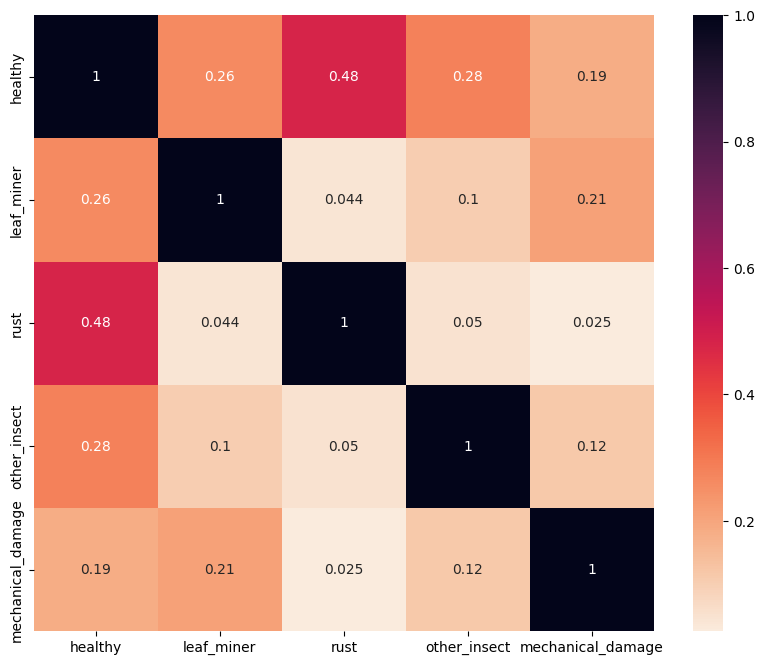

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
num_df = bool_df[cols]
sns.heatmap(num_df.corr().abs(),annot=True, ax=ax, cmap='rocket_r')

## Distribution of Types of Damage

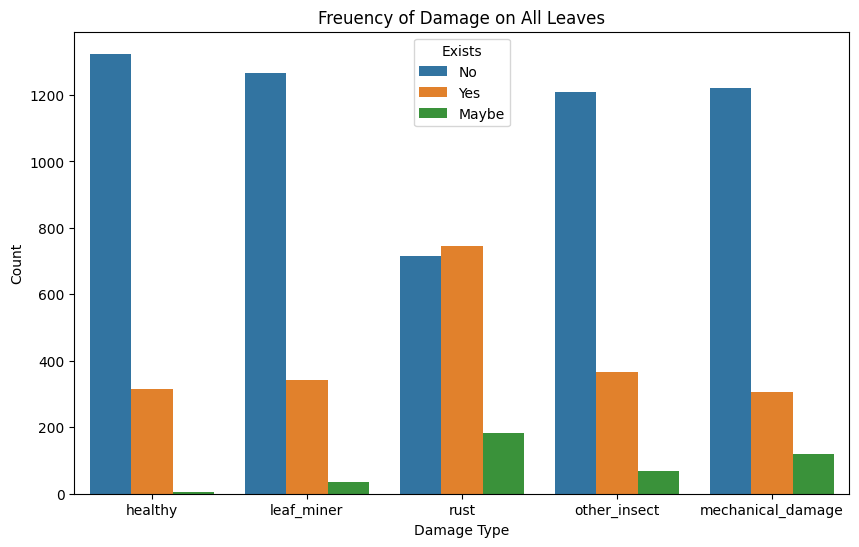

In [ ]:
distributions = leaf_df[cols].melt(var_name='Damage Type', value_name='Exists')
plt.figure(figsize=(10,6))
sns.countplot(data=distributions, x='Damage Type', hue='Exists')
plt.title("Freuency of Damage on All Leaves")
plt.ylabel("Count")
plt.show()

## Overlap betwen Damage Types

In [ ]:
overlap_df = bool_df[cols].apply(lambda col: pd.to_numeric(col))
overlap_df = overlap_df.apply(lambda col: col.gt(0).astype(int))

# Add columns for the opposite of each feature
for col in cols:
    overlap_df[f'not_{col}'] = (overlap_df[col] == 0).astype(int)

all_cols = ['healthy', 'not_healthy', 'leaf_miner', 'not_leaf_miner', 'rust', 'not_rust', 'other_insect', 'not_other_insect', 'mechanical_damage', 'not_mechanical_damage']
percent_overlap = pd.DataFrame(index=all_cols, columns=all_cols)

for row_col in all_cols:
    subset = overlap_df[overlap_df[row_col] == 1]
    percent_overlap.loc[row_col] = subset[all_cols].sum()
percent_overlap = percent_overlap.astype(float)
percent_overlap = percent_overlap.div(overlap_df[all_cols].sum(), axis=1)

percent_overlap

,healthy,not_healthy,leaf_miner,not_leaf_miner,rust,not_rust,other_insect,not_other_insect,mechanical_damage,not_mechanical_damage
healthy,1.000000,0.000000,0.000000,0.250987,0.032362,0.402797,0.004598,0.261806,0.094563,0.228056
not_healthy,0.000000,1.000000,1.000000,0.749013,0.967638,0.597203,0.995402,0.738194,0.905437,0.771944
leaf_miner,0.000000,0.283233,1.000000,0.000000,0.270766,0.173427,0.305747,0.200497,0.078014,0.280558
not_leaf_miner,1.000000,0.716767,0.000000,1.000000,0.729234,0.826573,0.694253,0.799503,0.921986,0.719442
rust,0.094340,0.677492,0.669333,0.533544,1.000000,0.000000,0.535632,0.574979,0.550827,0.569319
not_rust,0.905660,0.322508,0.330667,0.466456,0.000000,1.000000,0.464368,0.425021,0.449173,0.430681
other_insect,0.006289,0.327039,0.354667,0.238358,0.251348,0.282517,1.000000,0.000000,0.182033,0.293683
not_other_insect,0.993711,0.672961,0.645333,0.761642,0.748652,0.717483,0.000000,1.000000,0.817967,0.706317
mechanical_damage,0.125786,0.289275,0.088000,0.307814,0.251348,0.265734,0.177011,0.286661,1.000000,0.000000
not_mechanical_damage,0.874214,0.710725,0.912000,0.692186,0.748652,0.734266,0.822989,0.713339,0.000000,1.000000


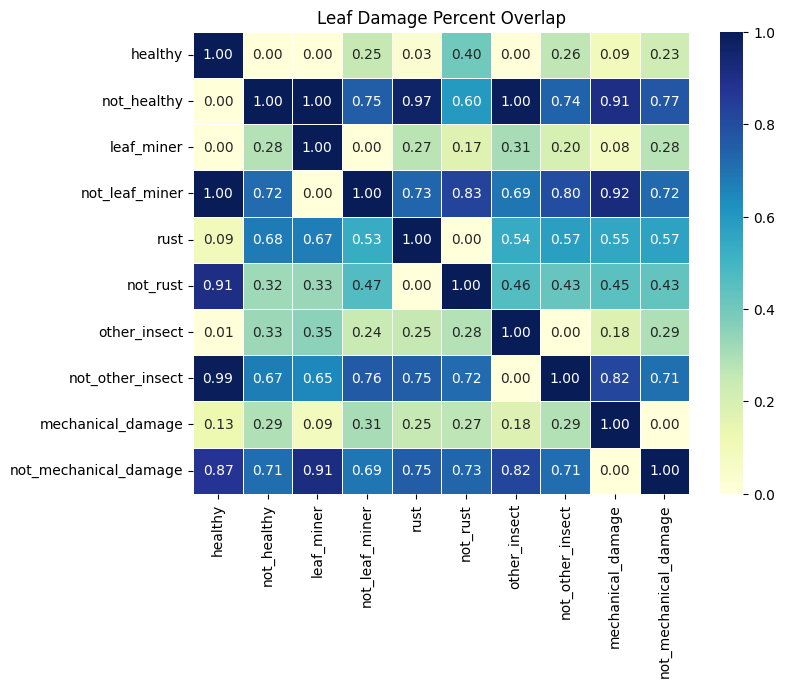

In [ ]:
# graph it nicely
plt.figure(figsize=(8,6))
sns.heatmap(percent_overlap, annot=True, fmt='.2f', cmap="YlGnBu", linewidths=0.5)
plt.title("Leaf Damage Percent Overlap")
plt.show()

## Geographic Distribution

In [ ]:
# Load the GPS data
gps_url = "https://huggingface.co/datasets/imageomics/invasive_plants_hawaii/raw/main/metadata/protocol/sites_metadata_gps.csv"
gps_data = pd.read_csv(gps_url)

# See what columns are in the GPS file
print("\nGPS Data:")
print(gps_data)


GPS Data:
                Site Name  ID   Latitude   Longitude Elevation_Estimates  \
0                  P-Road   1  19.571083 -155.202972             ~3000ft   
1   WAIAKEA Research Site   2  19.647940 -155.077167              ~630ft   
2                    Boat   3  19.625333 -155.100528                 NaN   
3         Hunter Check-in   4  19.599670 -155.136520                524m   
4            Mud Entrance   5  19.620739 -155.106473                 NaN   
5                  D-Road   6  19.615611 -155.113194                 NaN   
6                  Site 7   7  19.613361 -155.116944                 NaN   
7              Fern Acres   8  19.526990 -155.098250                475m   
8           Mountain Bike   9  19.634930 -155.085760                 NaN   
9                  K-Road  10  19.587692 -155.157478                640m   
10                Site 11  11  19.582460 -155.167960                 NaN   
11   Upper dirt bike park  12  19.584290 -155.164610                 NaN   



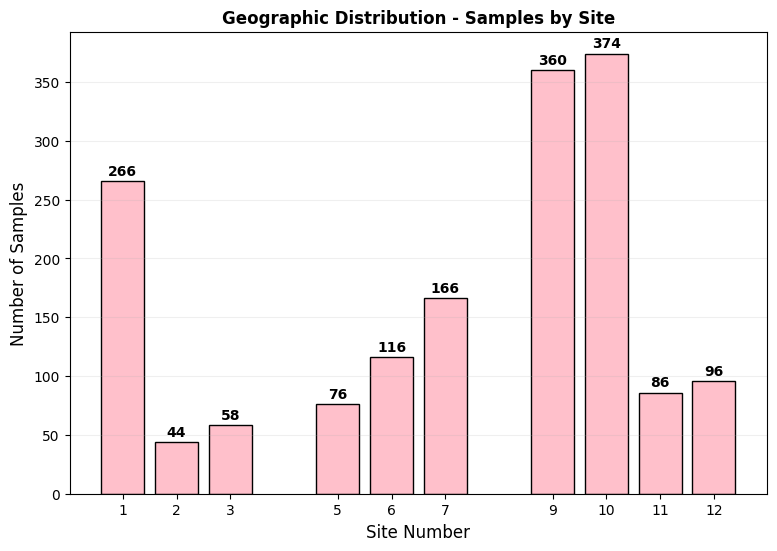


Total samples: 1642
Number of sites: 10


In [ ]:
# Get site column
sites = ds['site']

# Count samples per site
site_counts = pd.Series(sites).value_counts().sort_index()

plt.figure(figsize=(9, 6))
plt.bar(site_counts.index, site_counts.values, color='pink', edgecolor='black')
plt.xlabel('Site Number', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.title('Geographic Distribution - Samples by Site', fontweight='bold')
plt.xticks(site_counts.index)
plt.grid(axis='y', alpha=0.2)

# Add numbers on bars
for i, v in enumerate(site_counts.values):
    plt.text(site_counts.index[i], v + 5, str(v), ha='center', fontweight='bold')

plt.show()

print(f"\nTotal samples: {len(sites)}")
print(f"Number of sites: {len(site_counts)}")

## Challenges for building a classifier

The key challenge for this dataset is that it only has 2.56 k images for the full split. When using deep CNNs, the dataset size is at risk for overfitting. A ways to offset this is to use transfer learning and start from a pretrained model. There might be a class imbalance for the type of damage. Rust is over represented in the dataset and may lead to false positives. There is also label ambiguity of maybe, which adds noise to the training. There might be a domain shift because the dataset has collected in a lab environment where the background is a grid. When trying to use the model in a natural environemnt with different lighting, there might be leakage from the background. For this issue, we plan to preprocess images to minimize the impacts the backgtound has.

## Random Sampling of Images

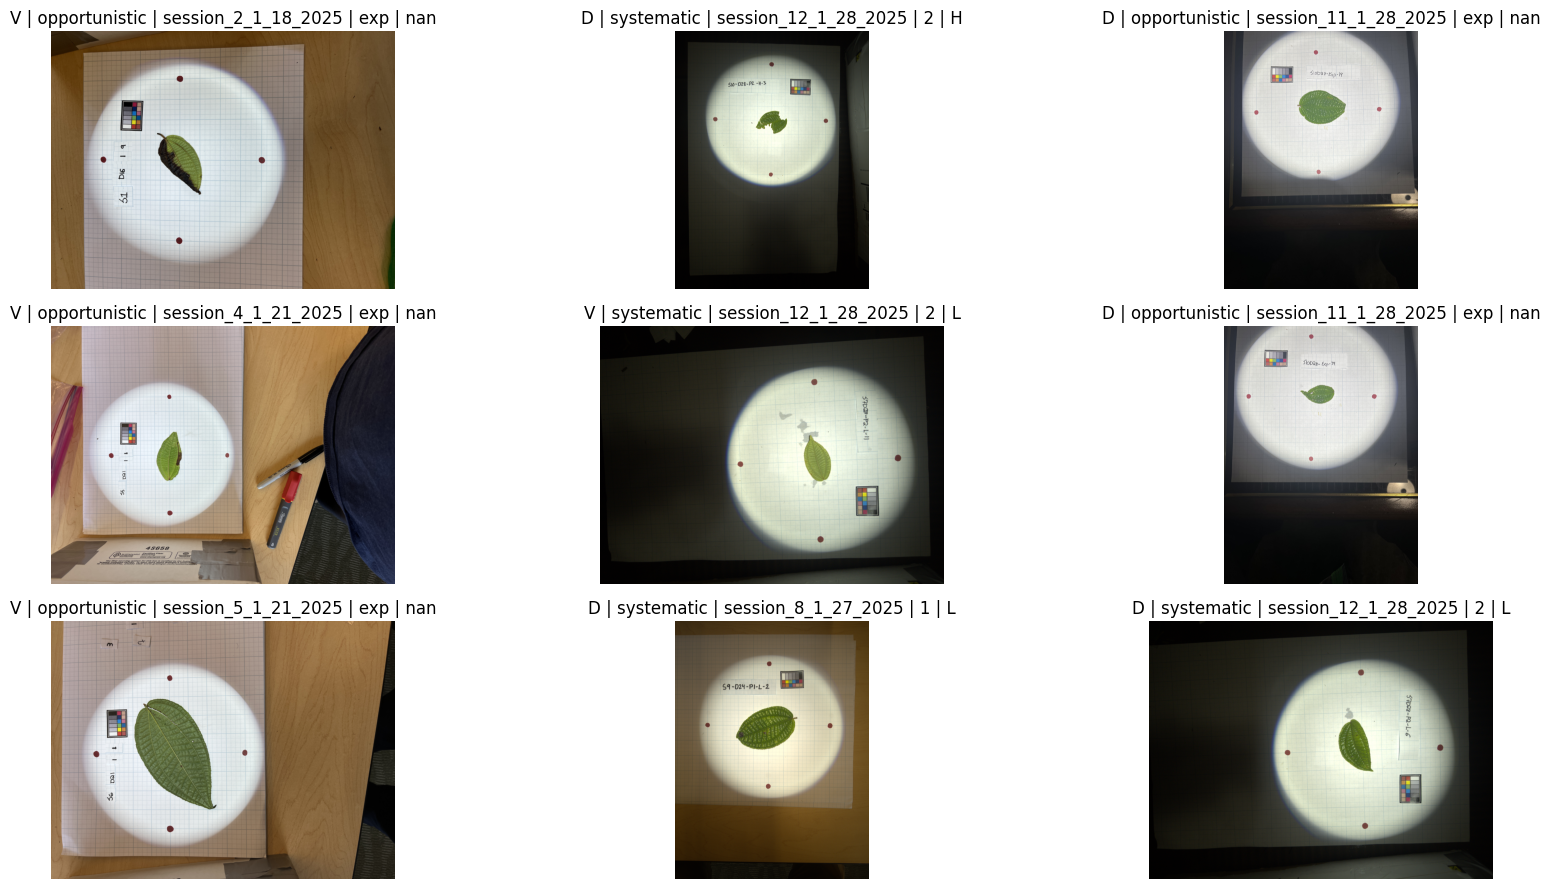

In [ ]:
import matplotlib.pyplot as plt

samples = ds.shuffle(seed=42).select(range(9))
fig, axes = plt.subplots(3, 3, figsize=(18, 9))
for ax, ex in zip(axes.ravel(), samples):
    img = ex["image"]  # PIL.Image
    ax.imshow(img)
    # Try to show helpful metadata if present
    bits = []
    for k in ("view","sampling_type","session","plant","level"):
        if k in ex and ex[k] not in (None, ""):
            bits.append(str(ex[k]))
    ax.set_title(" | ".join(bits) if bits else "sample")
    ax.axis("off")
plt.tight_layout(); plt.show()


## Distribution of image sizes

In [ ]:
import pandas as pd

wh = [ex["image"].size for ex in ds]          # (width, height)
sizes_df = pd.DataFrame(wh, columns=["width","height"])
sizes_df["area"] = sizes_df["width"] * sizes_df["height"]
sizes_df.describe()

,width,height,area
count,1642.000000,1642.000000,1.642000e+03
mean,3681.763703,3582.216809,1.302690e+07
std,802.819946,499.020835,3.026311e+06
min,3024.000000,3024.000000,1.219277e+07
25%,3024.000000,3024.000000,1.219277e+07
50%,4032.000000,4000.000000,1.219277e+07
75%,4032.000000,4032.000000,1.219277e+07
max,6000.000000,4032.000000,2.400000e+07


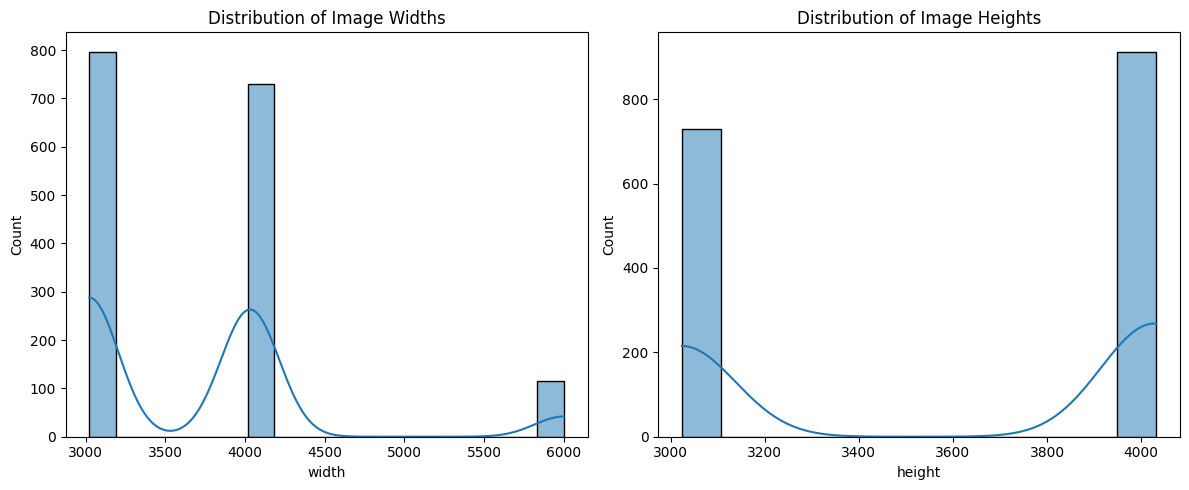

In [ ]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(sizes_df["width"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Image Widths")
sns.histplot(sizes_df["height"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Image Heights")
plt.tight_layout()
plt.show()

## Are there strong correlations between leaf damage and location site?

In [ ]:
import pandas as pd
import numpy as np

site_results = []

damage_types = [
    "healthy",
    "rust",
    "leaf_miner",
    "other_insect",
    "mechanical_damage"
]

damage_amounts = ["Yes", "No", "Maybe"]

for site in leaf_df["site"].unique():
    result = {
        "site": site,
        "total": len(leaf_df[leaf_df["site"] == site])
    }
    for damage_type in damage_types:
        values = leaf_df[
            (leaf_df["site"] == site)
        ][damage_type].value_counts()
        for damage_amount in damage_amounts:
            if damage_amount not in values:
                result[f"{damage_type}_{damage_amount}"] = 0
            else:
                result[f"{damage_type}_{damage_amount}"] = values[damage_amount]
    site_results.append(result)

df = pd.DataFrame(site_results)
df.set_index("site", inplace=True)
df.sort_index(inplace=True)

df["healthy_percentage"] = df["healthy_Yes"] / df["total"]
print("Healthy percentage by site:")
for site in df.index:
    print(f"Site {site}: {df.loc[site]["healthy_percentage"]:.2%} (n={int(df.loc[site]['total'])})")


Healthy percentage by site:
Site 1: 24.81% (n=266)
Site 2: 36.36% (n=44)
Site 3: 3.45% (n=58)
Site 5: 0.00% (n=76)
Site 6: 1.72% (n=116)
Site 7: 16.87% (n=166)
Site 9: 22.22% (n=360)
Site 10: 16.04% (n=374)
Site 11: 39.53% (n=86)
Site 12: 27.08% (n=96)


## Are there any missing or inconsistent metadata values?

In [ ]:
results = []

for column in leaf_df.columns:
    if column == "image":
        continue

    values = leaf_df[column]

    is_numeric = values.apply(lambda x: isinstance(x, (int, float)))
    numeric_values = values[is_numeric]

    z_scores = (numeric_values - np.mean(numeric_values)) / np.std(numeric_values)
    outliers = np.abs(z_scores) > 3

    result = {
        "column": column,
        "nan_count": values.isna().sum() + (values == "nan").sum(),
        "unique_count": values.nunique(),
        "outlier_count": np.sum(outliers),
    }

    for count_type in ["nan", "outlier"]:
        result[f"{count_type}_percentage"] = result[f"{count_type}_count"] / len(values)

    results.append(result)

df = pd.DataFrame(results)
df.set_index("column", inplace=True)

df

,nan_count,unique_count,outlier_count,nan_percentage,outlier_percentage
column,,,,,
session,0,12,0,0.000000,0.0
filename,0,1596,0,0.000000,0.0
sampling_type,0,2,0,0.000000,0.0
site,0,10,0,0.000000,0.0
day,0,6,0,0.000000,0.0
plant,0,4,0,0.000000,0.0
level,982,3,0,0.598051,0.0
view,0,2,0,0.000000,0.0
healthy,0,3,0,0.000000,0.0
